In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
from scipy.stats import ttest_ind
from numba import njit, jit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
meta = pd.read_csv('../data/META_SL.csv')

In [3]:
meta['plat'].unique()

array(['Agilent', 'Illumina_NGS', 'Affymetrix_U133', 'Illumina_Chip',
       'Affymetrix_HUG', 'Affymetrix_PRV'], dtype=object)

In [4]:
meta

,CN,type,plat,TP
0,C_1,Solid tumor,Agilent,Solid tumor_Agilent
1,C_2,Solid tumor,Agilent,Solid tumor_Agilent
2,C_3,Solid tumor,Agilent,Solid tumor_Agilent
3,C_4,Solid tumor,Agilent,Solid tumor_Agilent
4,C_5,Solid tumor,Agilent,Solid tumor_Agilent
...,...,...,...,...
7162,C_7163,C,Affymetrix_PRV,C_Affymetrix_PRV
7163,C_7164,D,Affymetrix_PRV,D_Affymetrix_PRV
7164,C_7165,D,Affymetrix_PRV,D_Affymetrix_PRV
7165,C_7166,D,Affymetrix_PRV,D_Affymetrix_PRV


#### Данные, на которых нужно проверить гипотезу

In [5]:
data = pd.read_csv('D:/data/D.csv')

In [6]:
data.head()

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,6643.516325,4403.683708,4724.194736,11706.705541,8098.411741,5742.316169,7196.116646,6604.939238,7085.480582,2772.994176,...,4718.572643,4608.884284,7380.903406,7262.257449,7339.202467,7567.624649,6052.659638,6158.133034,6300.269276,5993.298083
AACS,1673.326402,1341.196434,1550.409181,1730.812362,1611.224636,1409.646002,1365.222345,1382.544591,1728.802336,1553.760219,...,532.793530,514.553519,370.835410,336.475249,340.346558,371.670515,434.990196,445.770896,424.250840,423.768551
AAK1,78.646747,92.972733,46.250858,37.835246,44.113968,26.360508,25.244360,59.322829,37.075189,116.110216,...,1869.562927,1777.261543,606.124084,532.752477,516.917329,547.181591,1187.637707,1204.467056,1287.182821,1377.968487
AAMP,3339.946493,2589.276214,2791.713253,3777.819279,5243.781689,2720.546963,2972.385159,2599.779541,3888.775389,5365.917818,...,2150.316404,2105.565629,1670.038089,1677.278133,1584.018943,1726.719267,1745.684340,1791.939958,1821.103946,1882.454857
AANAT,637.709285,456.084505,296.177852,315.593996,422.277152,140.494386,134.513742,393.417087,289.735737,882.713728,...,108.472934,101.016642,74.167082,81.569757,71.651907,85.174493,94.438661,97.420129,101.012105,86.483378


In [7]:
data.columns = meta['CN']

In [8]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,6643.516325,4403.683708,4724.194736,11706.705541,8098.411741,5742.316169,7196.116646,6604.939238,7085.480582,2772.994176,...,4718.572643,4608.884284,7380.903406,7262.257449,7339.202467,7567.624649,6052.659638,6158.133034,6300.269276,5993.298083
AACS,1673.326402,1341.196434,1550.409181,1730.812362,1611.224636,1409.646002,1365.222345,1382.544591,1728.802336,1553.760219,...,532.793530,514.553519,370.835410,336.475249,340.346558,371.670515,434.990196,445.770896,424.250840,423.768551
AAK1,78.646747,92.972733,46.250858,37.835246,44.113968,26.360508,25.244360,59.322829,37.075189,116.110216,...,1869.562927,1777.261543,606.124084,532.752477,516.917329,547.181591,1187.637707,1204.467056,1287.182821,1377.968487
AAMP,3339.946493,2589.276214,2791.713253,3777.819279,5243.781689,2720.546963,2972.385159,2599.779541,3888.775389,5365.917818,...,2150.316404,2105.565629,1670.038089,1677.278133,1584.018943,1726.719267,1745.684340,1791.939958,1821.103946,1882.454857
AANAT,637.709285,456.084505,296.177852,315.593996,422.277152,140.494386,134.513742,393.417087,289.735737,882.713728,...,108.472934,101.016642,74.167082,81.569757,71.651907,85.174493,94.438661,97.420129,101.012105,86.483378


In [9]:
data = data.astype(float)

In [10]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,6643.516325,4403.683708,4724.194736,11706.705541,8098.411741,5742.316169,7196.116646,6604.939238,7085.480582,2772.994176,...,4718.572643,4608.884284,7380.903406,7262.257449,7339.202467,7567.624649,6052.659638,6158.133034,6300.269276,5993.298083
AACS,1673.326402,1341.196434,1550.409181,1730.812362,1611.224636,1409.646002,1365.222345,1382.544591,1728.802336,1553.760219,...,532.793530,514.553519,370.835410,336.475249,340.346558,371.670515,434.990196,445.770896,424.250840,423.768551
AAK1,78.646747,92.972733,46.250858,37.835246,44.113968,26.360508,25.244360,59.322829,37.075189,116.110216,...,1869.562927,1777.261543,606.124084,532.752477,516.917329,547.181591,1187.637707,1204.467056,1287.182821,1377.968487
AAMP,3339.946493,2589.276214,2791.713253,3777.819279,5243.781689,2720.546963,2972.385159,2599.779541,3888.775389,5365.917818,...,2150.316404,2105.565629,1670.038089,1677.278133,1584.018943,1726.719267,1745.684340,1791.939958,1821.103946,1882.454857
AANAT,637.709285,456.084505,296.177852,315.593996,422.277152,140.494386,134.513742,393.417087,289.735737,882.713728,...,108.472934,101.016642,74.167082,81.569757,71.651907,85.174493,94.438661,97.420129,101.012105,86.483378


#### Код Стьюдента

In [11]:
rng = np.random.default_rng()

In [12]:
def get_splitted_columns(columns):
    shuffled = rng.permutation(columns)
    columns_1 = shuffled[:len(columns) // 2]
    columns_2 = shuffled[len(columns) // 2:]
    return columns_1, columns_2

In [13]:
def split_for_f(gene, columns_1, columns_2):
    sample_1 = gene[columns_1].values
    sample_2 = gene[columns_2].values
    return f(sample_1, sample_2)

$$
f_g = sign(\overline{D}_g - \overline{H}_g) \cdot (-lg(P_g))
$$

In [14]:
# @njit
def f(sample_1, sample_2):
    sign = np.sign(sample_1.mean() - sample_2.mean())
    p_value = ttest_ind(sample_1, sample_2)[1]
    return sign * (-np.log1p(p_value))

In [15]:
def calc_corr(data, fixed_cols, splitting_cols):
    cols_1, cols_2 = get_splitted_columns(splitting_cols)
    
    f_1 = data.apply(split_for_f, args=(fixed_cols, cols_1), axis=1)
    f_2 = data.apply(split_for_f, args=(fixed_cols, cols_2), axis=1)
    
    return f_1.corr(f_2)

In [16]:
# %time calc_corr(data, plat_1, plat_2)

#### Перебор всех пар платформ

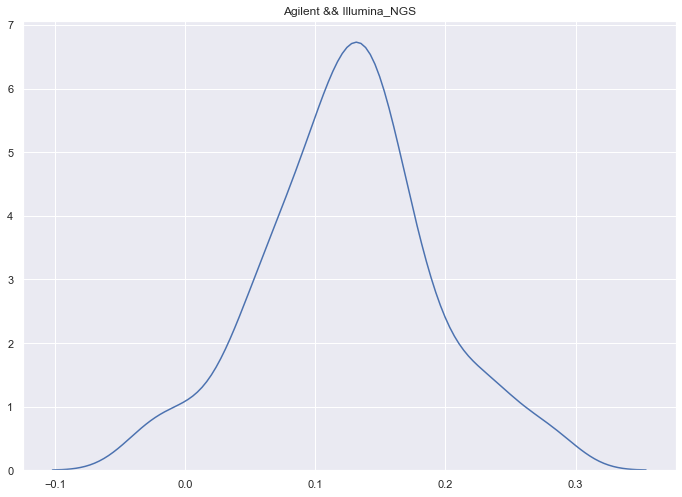

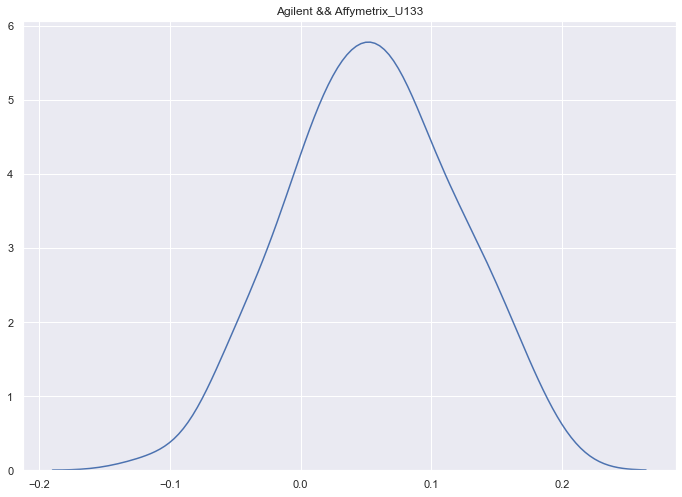

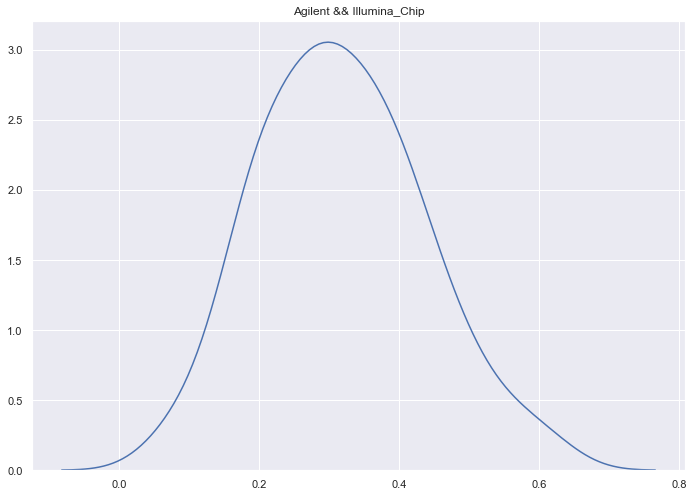

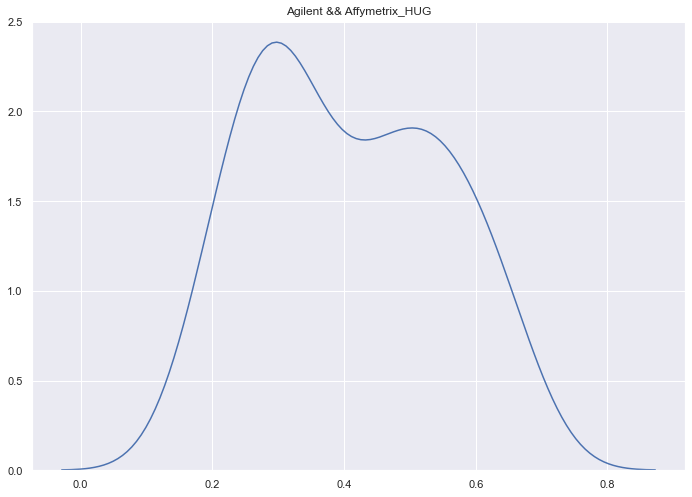

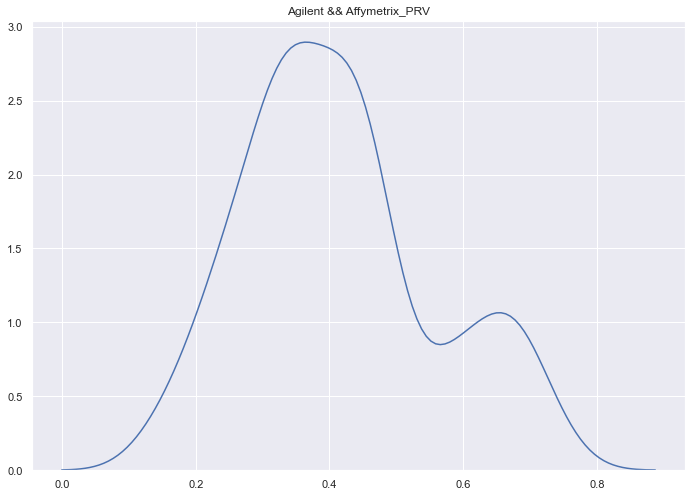

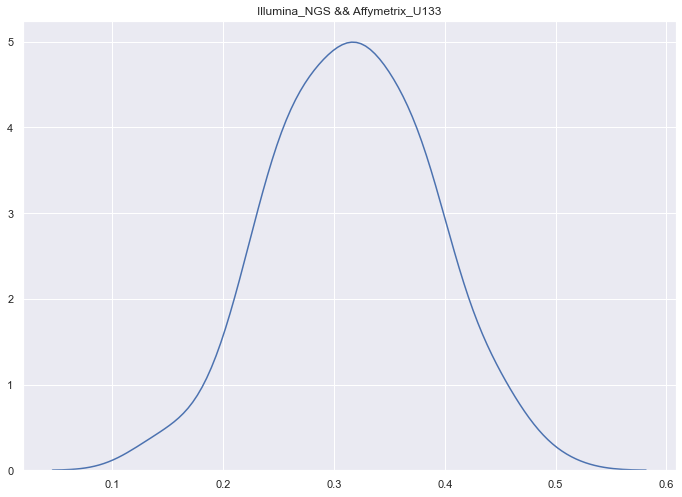

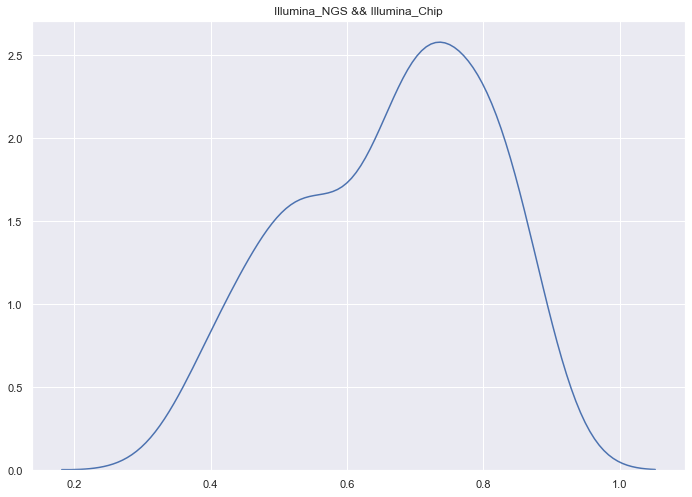

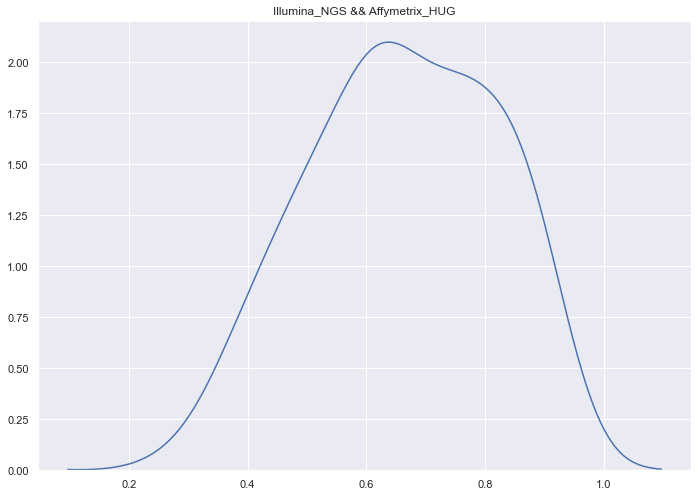

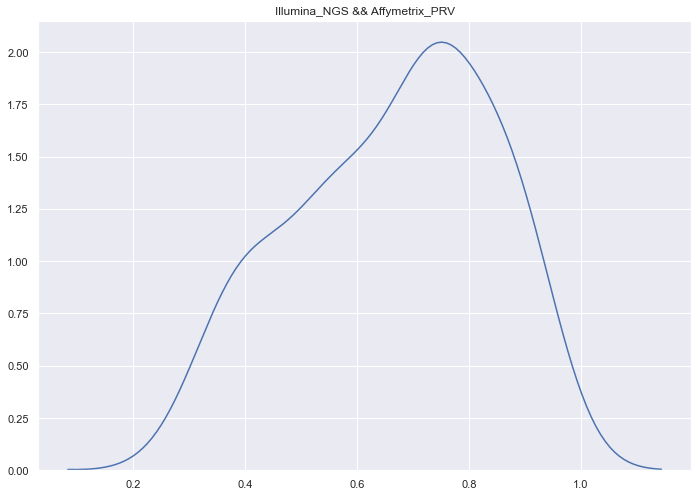

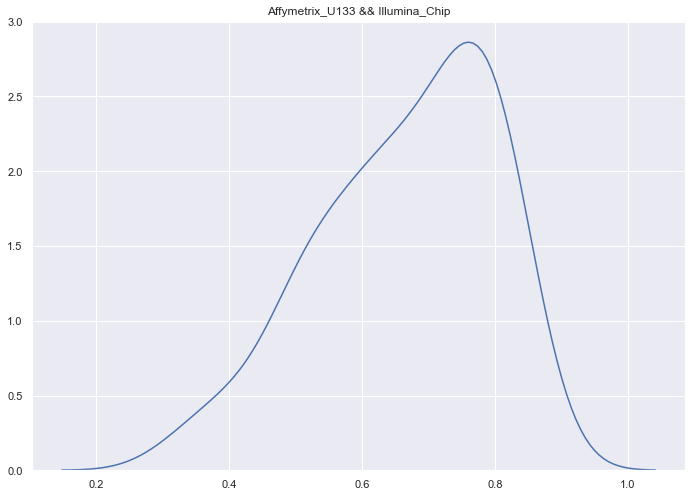

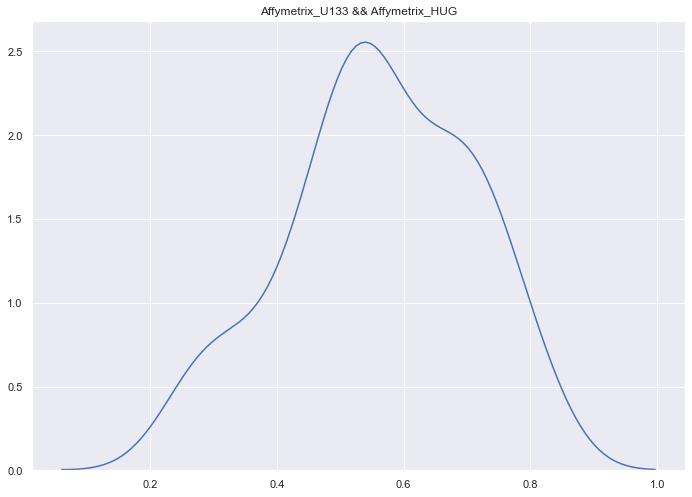

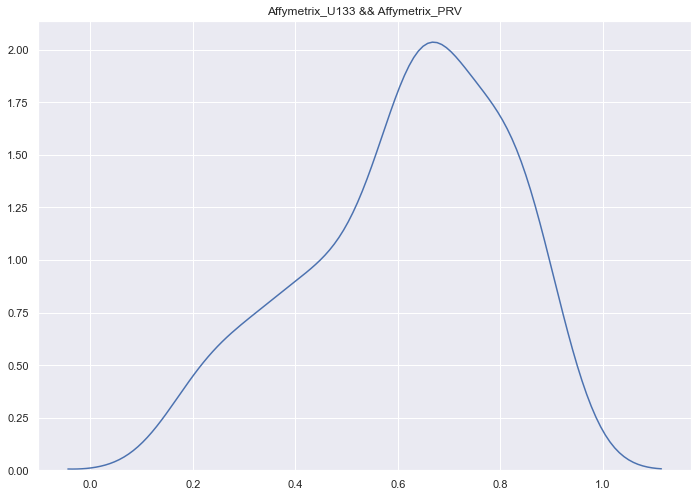

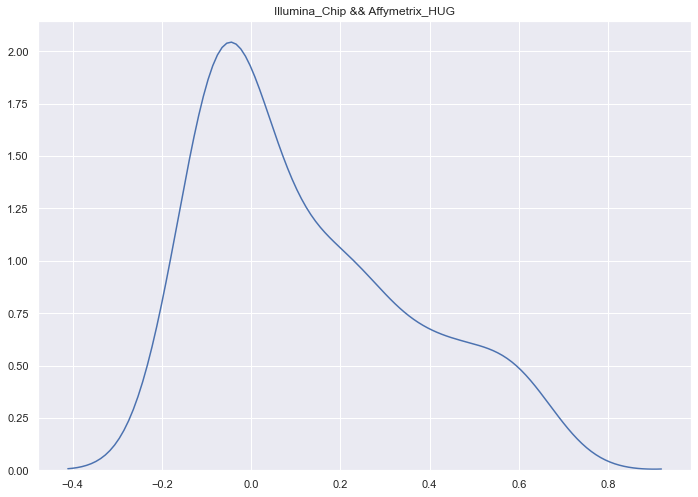

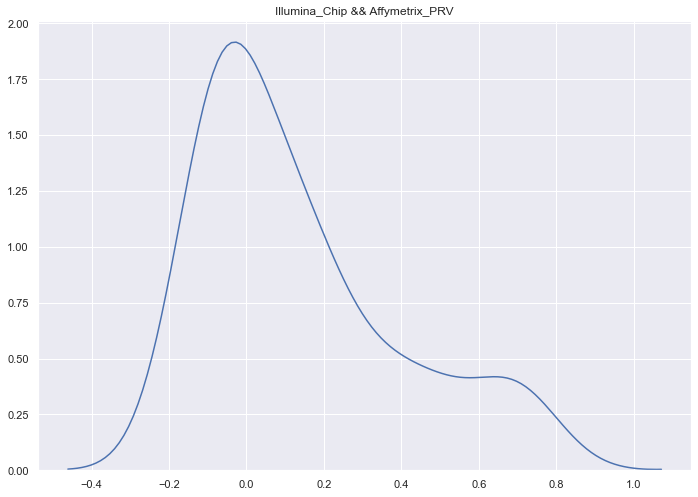

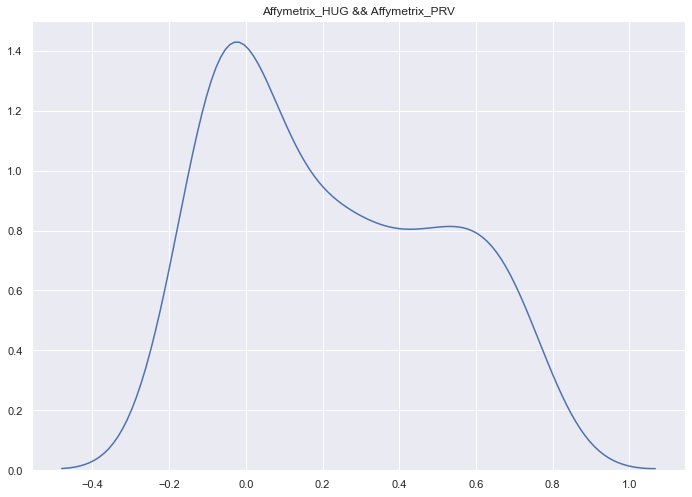

In [17]:
for idx_1, title_1 in enumerate(meta['plat'].unique()):
    for idx_2, title_2 in enumerate(meta['plat'].unique()):
        
        if(idx_2 > idx_1):
            
            plat_1 = meta[meta['plat'] == title_1]['CN']
            plat_2 = meta[meta['plat'] ==  title_2]['CN']
            
            corrs = [calc_corr(data, plat_1, plat_2) for i in range(100)]
            
            plt.figure()
            plt.title(title_1 + " && " + title_2)
            sns.distplot(corrs, hist=False)